# Group 8 HW2_AD_mmse

|  系所   | 年級  |  姓名   | 學號  |工作分配  |
|  :----:  | :----:  | :----:  | :----: |:----:  |
| 不分系  | 大四 | 盧柏翰  | F14081088 |資料前處理 & AD_classify 程式撰寫 |
| 醫工所  | 碩一 | 朱俊憲  | P86114165 |AD_mmse 程式撰寫 |
| 醫工系  | 大四 | 徐嘉駿  | F94099011 | 報告撰寫（併入 ipynb） |

In [ ]:
import numpy as np
import pandas as pd

# Load the datasets

- Save and upload .xlsx as .csv manually, biz the file's index is fault
- Load the google drive directory

In [ ]:
control_dir = '/content/drive/MyDrive/Colab Notebooks/NLP_HW2/train/control'
patient_dir = '/content/drive/MyDrive/Colab Notebooks/NLP_HW2/train/patient'

Use panda to read the .csv file

In [ ]:
train_cc_eval = pd.read_csv(control_dir + '/train.cc.eval.csv')
print(train_cc_eval.shape)

(54, 40)


In [ ]:
train_cd_eval = pd.read_csv(patient_dir + '/train.cd.eval.csv')
print(train_cd_eval.shape)

(999, 40)


Use panda to read .txt file and use '\s+' to sepearate to two cols 

# Preprocessing

## Deal with cd_meta_data.txt
- Load .txt file
- and use '\s+' to seperate the ID and mmse

In [ ]:
cc_meta_data = pd.read_csv(control_dir + '/cc_meta_data.txt', sep='\s+')
print(cc_meta_data.shape)
cc_meta_data.head(5)

(54, 2)


,ID,mmse
0,S001,NaN
1,S002,30.0
2,S003,29.0
3,S004,30.0
4,S005,30.0


In [ ]:
cd_meta_data = pd.read_csv(patient_dir + '/cd_meta_data.txt', sep='\s+')
print(cd_meta_data.shape)
cd_meta_data.head(5)

(54, 2)


,ID,mmse
0,S079,11
1,S080,19
2,S081,19
3,S082,11
4,S083,30


## Concatenate the mmse into train data

In [ ]:
cc_eval = pd.concat([cc_meta_data, train_cc_eval],axis=1)
print(cc_eval.shape)
cc_eval.head(5)

(54, 42)


,ID,mmse,File,Language,Corpus,Code,Group,Duration_(sec),Total_Utts,MLU_Utts,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,S001,NaN,S001.cha,eng,Pitt,PAR,Control,83,13,13,...,4.571,1.143,16.571,6.857,1.321,0.851,80,94,4,1
1,S002,30.0,S002.cha,eng,Pitt,PAR,Control,49,13,13,...,7.368,0.000,16.842,3.158,1.412,1.136,50,44,0,0
2,S003,29.0,S003.cha,eng,Pitt,PAR,Control,48,13,13,...,2.655,0.000,15.929,10.619,1.316,0.915,54,59,3,0
3,S004,30.0,S004.cha,eng,Pitt,PAR,Control,73,23,23,...,8.411,1.869,12.150,10.280,1.077,0.981,104,106,3,4
4,S005,30.0,S005.cha,eng,Pitt,PAR,Control,75,11,11,...,6.742,2.247,13.483,10.674,0.969,0.892,83,93,6,0


In [ ]:
cd_eval = pd.concat([cd_meta_data, train_cd_eval],axis=1)
print(cd_eval.shape)

(999, 42)


## Drop the cols we don't need

- 'ID' just the meaningless index
- 'File' just the index of data, which doesn't influence the AD judgement
- 'Language' is 'English' for all data
- 'Corpus' is 'Pitt' for all data
- 'Code' is 'PAR' for all data
- This task is in order to predict mmse not 'Group'


In [ ]:
cc_eval = cc_eval.drop(['ID','File','Language','Corpus','Code','Group'], axis=1)
print(cc_eval.shape)
cc_eval.head(5)

(54, 36)


,mmse,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,NaN,83,13,13,12.923,15.769,81,175,0.463,126.506,...,4.571,1.143,16.571,6.857,1.321,0.851,80,94,4,1
1,30.0,49,13,13,6.615,8.462,54,95,0.568,116.327,...,7.368,0.000,16.842,3.158,1.412,1.136,50,44,0,0
2,29.0,48,13,13,8.154,10.000,59,113,0.522,141.250,...,2.655,0.000,15.929,10.619,1.316,0.915,54,59,3,0
3,30.0,73,23,23,8.609,10.261,94,214,0.439,175.890,...,8.411,1.869,12.150,10.280,1.077,0.981,104,106,3,4
4,30.0,75,11,11,15.273,18.455,88,178,0.494,142.400,...,6.742,2.247,13.483,10.674,0.969,0.892,83,93,6,0


In [ ]:
cd_eval = cd_eval.drop(['ID','File','Language','Corpus','Code','Group'], axis=1)
print(cd_eval.shape)
cd_eval.head(5)

(999, 36)


,mmse,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,11.0,68.0,13.0,13.0,8.308,9.769,59.0,119.0,0.496,105.000,...,6.723,0.840,12.605,15.126,0.783,0.812,52.0,64.0,7.0,7.0
1,19.0,13.0,3.0,3.0,5.333,7.000,14.0,19.0,0.737,87.692,...,5.263,0.000,15.789,15.789,1.333,0.800,8.0,10.0,0.0,1.0
2,19.0,53.0,15.0,15.0,9.133,11.333,61.0,152.0,0.401,172.075,...,1.974,0.658,17.105,9.868,1.545,0.776,66.0,85.0,4.0,2.0
3,11.0,107.0,11.0,10.0,9.500,11.000,55.0,105.0,0.524,58.879,...,7.619,1.905,15.238,12.381,1.133,0.651,41.0,63.0,3.0,12.0
4,30.0,58.0,7.0,7.0,10.286,12.143,44.0,73.0,0.603,75.517,...,4.110,0.000,12.329,9.589,1.000,0.895,34.0,38.0,2.0,1.0


## Deal with the NaN by dropna

In [ ]:
cc_eval = cc_eval.dropna(axis=0)
print(cc_eval.shape)
cc_eval.head(5)

(53, 36)


,mmse,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
1,30.0,49,13,13,6.615,8.462,54,95,0.568,116.327,...,7.368,0.000,16.842,3.158,1.412,1.136,50,44,0,0
2,29.0,48,13,13,8.154,10.000,59,113,0.522,141.250,...,2.655,0.000,15.929,10.619,1.316,0.915,54,59,3,0
3,30.0,73,23,23,8.609,10.261,94,214,0.439,175.890,...,8.411,1.869,12.150,10.280,1.077,0.981,104,106,3,4
4,30.0,75,11,11,15.273,18.455,88,178,0.494,142.400,...,6.742,2.247,13.483,10.674,0.969,0.892,83,93,6,0
5,29.0,53,17,17,7.765,9.529,71,142,0.500,160.755,...,4.225,2.113,11.972,11.268,1.304,0.868,66,76,3,0


In [ ]:
cd_eval = cd_eval.dropna(axis=0)
print(cd_eval.shape)

(54, 36)


## Concatenate all (cc and cd) data

In [ ]:
train_data = pd.concat([cc_eval, cd_eval], axis=0)
print(train_data.shape)
train_data.head(5)

(107, 36)


,mmse,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
1,30.0,49.0,13.0,13.0,6.615,8.462,54.0,95.0,0.568,116.327,...,7.368,0.000,16.842,3.158,1.412,1.136,50.0,44.0,0.0,0.0
2,29.0,48.0,13.0,13.0,8.154,10.000,59.0,113.0,0.522,141.250,...,2.655,0.000,15.929,10.619,1.316,0.915,54.0,59.0,3.0,0.0
3,30.0,73.0,23.0,23.0,8.609,10.261,94.0,214.0,0.439,175.890,...,8.411,1.869,12.150,10.280,1.077,0.981,104.0,106.0,3.0,4.0
4,30.0,75.0,11.0,11.0,15.273,18.455,88.0,178.0,0.494,142.400,...,6.742,2.247,13.483,10.674,0.969,0.892,83.0,93.0,6.0,0.0
5,29.0,53.0,17.0,17.0,7.765,9.529,71.0,142.0,0.500,160.755,...,4.225,2.113,11.972,11.268,1.304,0.868,66.0,76.0,3.0,0.0


# Spilt the dataset into X and y

In [ ]:
y = train_data['mmse']
print(y.shape)

(107,)


In [ ]:
X = train_data.drop(['mmse'], axis=1)
print(X.shape)

(107, 35)


# Turn dataframe into numpy

In [ ]:
X = X.values
y = y.values

# Spilt the data in to train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print('X_train shape: ',X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (71, 35)
X_test shape:  (36, 35)
y_train shape:  (71,)
y_test shape:  (36,)


## Print the range of mmse
(Just let me to know)

In [ ]:
print(y.max())
print(y.min())
print(y.max() - y.min())

30.0
1.0
29.0


# Model

## LinearRegression()

In [ ]:
from sklearn import linear_model                        # 線性回歸
from sklearn.preprocessing import PolynomialFeatures    # 多項式回歸
from sklearn.pipeline import make_pipeline              # 多項式回歸
from sklearn.datasets import make_regression            # Datasets

import matplotlib.pyplot as plt

In [ ]:
model_linear = linear_model.LinearRegression()
linear_history = model_linear.fit(X_train, y_train)

y_pred = linear_history.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
print('the rms is ', rms)

# For regrssion, we can use root mean square to check model's performance rather than accuracy

the rms is  7.855884200555807


## Polynomial Regression

- Use for loop to run through poly with different degree

In [ ]:
for count,degree in enumerate([1,2,3,4,5]):
    model = make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    history = model.fit(X_train,y_train)

    y_pred = history.predict(X_test)
    rms = mean_squared_error(y_test, y_pred, squared=False)
    print("rms of degree %d" %degree, "is ", rms )

rms of degree 1 is  12.25358258407232
rms of degree 2 is  12.479873178860764
rms of degree 3 is  18.742165999573153
rms of degree 4 is  28.70396211085214
rms of degree 5 is  43.223856202269694


## RandomForestRegressor

- Use gridsearchCV to find the best parameters of RandomForestRegressor

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfg = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [300, 350, 400, 450, 500],
    'max_features': ['auto'],
    'max_depth' : [6,7,8],
    'criterion' :['friedman_mse']
}

In [ ]:
CV_rfg = GridSearchCV(estimator=rfg, param_grid=param_grid, cv= 3)
rfg_history = CV_rfg.fit(X_train, y_train)

from IPython.display import clear_output 
clear_output()

In [ ]:
CV_rfg.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 400}

In [ ]:
y_pred = rfg_history.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print("rms is ", rms )

rms is  6.390432363067729


## Draw the training/testing curve

In [ ]:
rfg_best = RandomForestRegressor(
    
    criterion = 'friedman_mse', 
    max_depth = 7,
    max_features =  'auto',
    n_estimators =  400,
    random_state=42)

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rfg_best, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 47 instead of 50.
  warnings.warn(


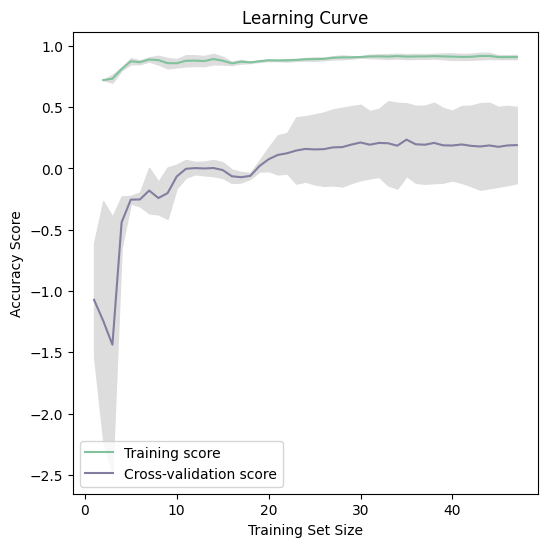

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, color="#7FC29B",  label="Training score")
plt.plot(train_sizes, test_mean, color="#817E9F", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.savefig('AD_mmse_learning_curve.png')
plt.show()


from google.colab import files
files.download('AD_mmse_learning_curve.png')

# Load testing dataset

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP_HW2/test/test.eval.re.csv')

## Drop the data we don't need, in order to fit our model

## Turn the testing file into test_X 

- In order to use our model to test

In [ ]:
test_X = test.drop(['File','Language','Corpus','Code', 'Group'], axis=1)
test_X.head(5)

,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,Verbs_Utt,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,34,6,6,8.667,10.333,34,55,0.618,97.059,1.500,...,3.636,1.818,18.182,1.818,1.444,1.120,28,25,0,0
1,62,12,12,13.833,15.917,75,172,0.436,166.452,1.833,...,3.488,2.326,16.860,7.558,1.955,0.789,75,95,3,0
2,55,8,8,9.000,11.000,48,80,0.600,87.273,1.375,...,5.000,0.000,15.000,12.500,1.500,0.778,35,45,1,0
3,36,8,7,4.143,5.429,30,35,0.857,58.333,0.125,...,2.857,0.000,11.429,0.000,2.333,1.692,22,13,0,0
4,45,8,8,10.000,12.375,51,87,0.586,116.000,1.750,...,3.448,1.149,14.943,11.494,1.188,0.826,38,46,1,3


## Predict the mmse score by the mode we trained

In [ ]:
test_Y = rfg_history.predict(test_X)
print(test_Y)

[26.92873744 28.6935666  24.20384915 27.24078741 28.41933184 24.22367841
 22.16691095 26.71215676 24.22054827 27.3633075  20.950192   28.77873469
 25.17748288 24.42714969 27.1628846  23.75854574 23.62270212 28.07936907
 24.79227241 25.01368809 22.84533734 26.66152618 20.376653   13.9014881
 15.7373125  27.96739143 29.00607631 21.53509942 27.31708026 22.9096714
 24.04033735 26.18170681 28.34546233 21.43131381 22.73884077 20.03372989
 25.91740234 17.93226853 26.46180352 24.41647451 27.37950624 14.728125
 14.11233333 28.51395544 26.4836461  20.72462714 17.35012067 20.97096838]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## Trun the float into int

- use round( ) fun

In [ ]:
test_Y = (np.round(test_Y)).astype(int)
print(test_Y)
print(test_Y.shape)

[27 29 24 27 28 24 22 27 24 27 21 29 25 24 27 24 24 28 25 25 23 27 20 14
 16 28 29 22 27 23 24 26 28 21 23 20 26 18 26 24 27 15 14 29 26 21 17 21]
(48,)


## Write the list to .txt

In [ ]:
with open(r'test_results_re.txt', 'w') as f:
  f.write("File Prediction\n")
  i = 1
  for index in test_Y: 
    f.write("%s" % i)
    f.write(" ")
    f.write("%s\n" % index)
    i = i+1